Cell 1 (imports + DB connection)

In [1]:
from pathlib import Path

import sqlite3

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

project_root = Path.cwd().parent

db_path = project_root / "data" / "Synthetic Dataset" / "product_analytics.db"

conn = sqlite3.connect(db_path)

Cell 2 (pull customer level data "returns")

In [2]:
query = """

SELECT 

    user_id,

    SUM(net_revenue) AS lifetime_revenue,

    COUNT(*) AS orders

FROM orders

GROUP BY user_id;

"""

customers = pd.read_sql_query(query, conn)

customers.head()

,user_id,lifetime_revenue,orders
0,1,249.36,1
1,3,239.73,3
2,4,23.41,1
3,5,235.32,1
4,6,525.62,3


Cell 3 (distributions)

In [3]:
customers.describe()

,user_id,lifetime_revenue,orders
count,4194.000000,4194.000000,4194.000000
mean,2505.342394,331.349220,2.145923
std,1441.743130,231.087387,1.170906
min,1.000000,10.630000,1.000000
25%,1255.250000,158.400000,1.000000
50%,2507.500000,282.780000,2.000000
75%,3755.750000,455.472500,3.000000
max,5000.000000,1540.180000,8.000000


Cell 4 (histogram)

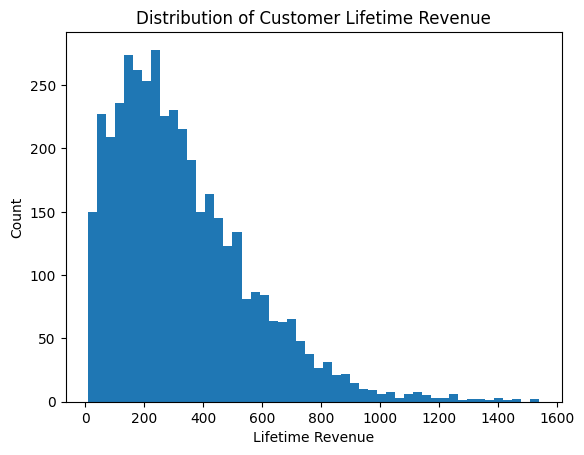

In [4]:
plt.figure()

plt.hist(customers["lifetime_revenue"], bins=50)

plt.title("Distribution of Customer Lifetime Revenue")

plt.xlabel("Lifetime Revenue")

plt.ylabel("Count")

plt.show()

Cell 5 (log scale)

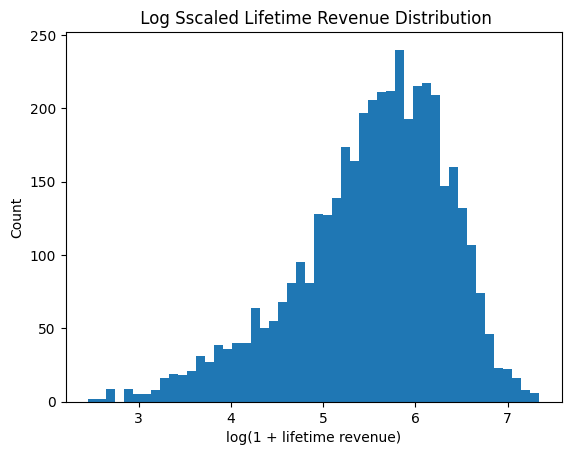

In [5]:
plt.figure()

plt.hist(np.log1p(customers["lifetime_revenue"]), bins=50)

plt.title(" Log Sscaled Lifetime Revenue Distribution")

plt.xlabel("log(1 + lifetime revenue)")

plt.ylabel("Count")

plt.show()

Cell 6 (percentiles)

In [6]:
customers["lifetime_revenue"].quantile([0.5, 0.75, 0.9, 0.95, 0.99])

0.50     282.7800
0.75     455.4725
0.90     648.1170
0.95     764.2840
0.99    1088.9837
Name: lifetime_revenue, dtype: float64

Cell 7 (volatility analogy)

In [7]:
customers["revenue_per_order"] = (

    customers["lifetime_revenue"] / customers["orders"]

)

customers["revenue_per_order"].describe()

count    4194.000000
mean      154.605567
std        77.472024
min        10.630000
25%        99.872500
50%       145.876667
75%       198.461875
max       649.830000
Name: revenue_per_order, dtype: float64

Cell 8 (volatility plot)

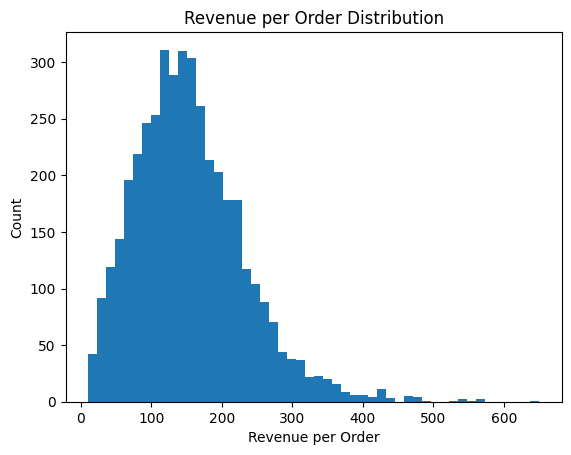

In [8]:
plt.figure()

plt.hist(customers["revenue_per_order"], bins=50)

plt.title("Revenue per Order Distribution")

plt.xlabel("Revenue per Order")

plt.ylabel("Count")

plt.show()

## Day 4 Insights

    - Customer revenue is highly right skewed; the mean is not representative of the typical customer.
    - A small fraction of customers accounts for a disproportionate share of total revenue.
    - Distribution shape resembles financial return distrutions with fat right tails.
    - Percentiles provide more actionable insight than averages alone

    These patterns highlight why risk aware metrics are critical when evaluating performance.